In [9]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [10]:
data=pd.read_csv("data.csv", skiprows=0) #using data frames to read csv file
data

,time (h),D11,D22,D12
0,0.033333,1.71,1.75,0.62
1,1.000000,1.56,1.59,0.93
2,2.000000,1.40,1.43,1.26
3,3.000000,1.28,1.31,1.50
4,4.000000,1.14,1.17,1.78
5,5.000000,1.17,1.20,1.71
6,6.000000,1.14,1.17,1.78
7,7.000000,1.06,1.09,1.93
8,8.000000,1.10,1.13,1.86
9,9.000000,1.10,1.13,1.86


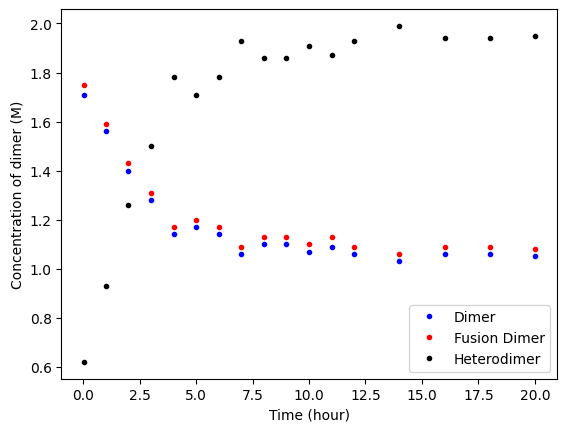

In [13]:
plt.plot(data["time (h)"],data["D11"], 'bo', markersize=3)
plt.plot(data["time (h)"],data["D22"], 'ro', markersize=3)
plt.plot(data["time (h)"],data["D12"], 'ko', markersize=3)
plt.xlabel("Time (hour)")
plt.ylabel("Concentration of dimer (M)")
plt.legend(tuple(['Dimer','Fusion Dimer' , 'Heterodimer']))

In [30]:
#Known values
d11_o = 1.71 #M
d22_o = 1.75 #M
d12_o = 0.62 #M

from scipy.integrate import odeint 
def odes(v,t,kf,kr): 

    D11 = v[0]
    D22 = v[1]
    D12 = v[2]
    
    f = [kf*(2*d11_o + d12_o - 2*D11 - D12)**2 - kr*D11, 
         kf*(2*d22_o + d12_o - 2*D22 - D12)**2 - kr*D22,
         2*kf*(2*d11_o + d12_o - 2*D11 - D12)*(2*d22_o + d12_o - 2*D22 - D12) - kr*D12]
    return f 

ic = [data["D11"].loc[0] , data["D22"].loc[0], data["D12"].loc[0]] #initial condition
time = data["time (h)"]
training_data1 = data.to_numpy()
training_data = training_data1[:,[1,2,3]]


print(ic)
print(training_data)

[1.71, 1.75, 0.62]
[[1.71 1.75 0.62]
 [1.56 1.59 0.93]
 [1.4  1.43 1.26]
 [1.28 1.31 1.5 ]
 [1.14 1.17 1.78]
 [1.17 1.2  1.71]
 [1.14 1.17 1.78]
 [1.06 1.09 1.93]
 [1.1  1.13 1.86]
 [1.1  1.13 1.86]
 [1.07 1.1  1.91]
 [1.09 1.13 1.87]
 [1.06 1.09 1.93]
 [1.03 1.06 1.99]
 [1.06 1.09 1.94]
 [1.06 1.09 1.94]
 [1.05 1.08 1.95]]


In [50]:
def RMSE(para):
    kf, kr = para;
    ODE_output = odeint(odes, ic, time, args = (kf,kr));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  

# Check that function works correctly
RMSE([100,1]) 

1.3440419618118633

In [56]:
from scipy.optimize import minimize

sol1 = minimize(RMSE, x0 = (100, 1));

print(sol1);

C:\Users\shrey\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\shrey\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\shrey\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


      fun: 0.3894065799822566
 hess_inv: array([[ 0.01255214, -0.01097608],
       [-0.01097608,  0.02730281]])
      jac: array([0.00042915, 0.00017758])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 217
      nit: 5
     njev: 68
   status: 2
  success: False
        x: array([100.22229079,   0.30914379])


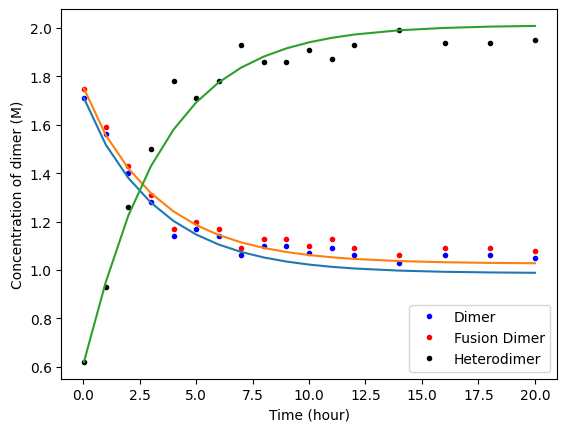

In [60]:
y = odeint(odes, ic, time, args=(100, 0.3))

plt.plot(data["time (h)"],data["D11"], 'bo', markersize=3)
plt.plot(data["time (h)"],data["D22"], 'ro', markersize=3)
plt.plot(data["time (h)"],data["D12"], 'ko', markersize=3)

plt.xlabel("Time (hour)")
plt.ylabel("Concentration of dimer (M)")
plt.legend(tuple(['Dimer','Fusion Dimer' , 'Heterodimer']))
plt.plot(data["time (h)"], y)

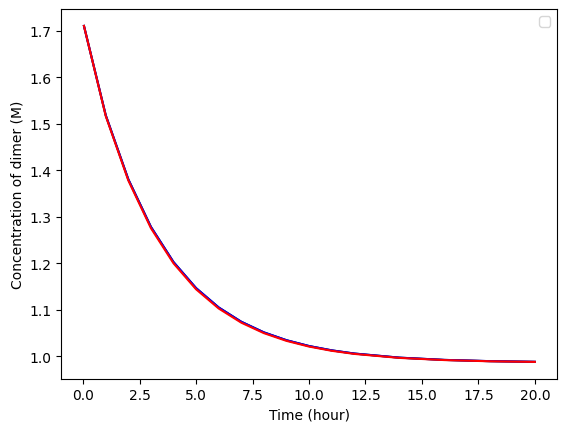

In [64]:
y1 = odeint(odes, ic, time, args=(100*1.01, 0.3))
y2 = odeint(odes, ic, time, args=(100, 0.3*1.01))

plt.xlabel("Time (hour)")
plt.ylabel("Concentration of dimer (M)")
plt.legend(tuple(['Dimer','Fusion Dimer' , 'Heterodimer']))
plt.plot(time, y[:,0],'k', label = "Nominal");
plt.plot(time, y1[:,0],'b', label = "kf");
plt.plot(time, y2[:,0],'r', label = "kr");


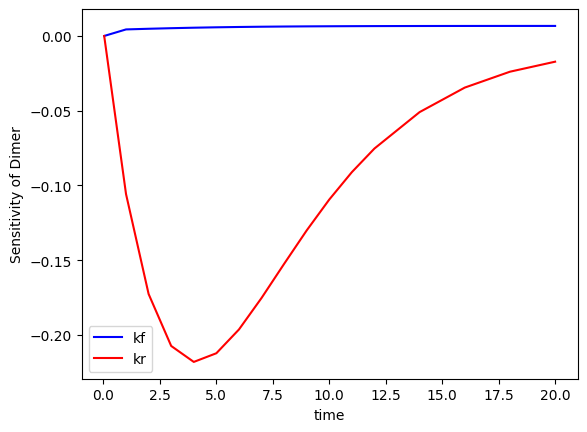

In [65]:
plt.xlabel("time")
plt.ylabel("Sensitivity of Dimer")
plt.plot(time, ((y1[:,0] - y[:,0])/y[:,0])/0.01,'b', label = "kf");
plt.plot(time, ((y2[:,0] - y[:,0])/y[:,0])/0.01,'r', label = "kr");
plt.legend()

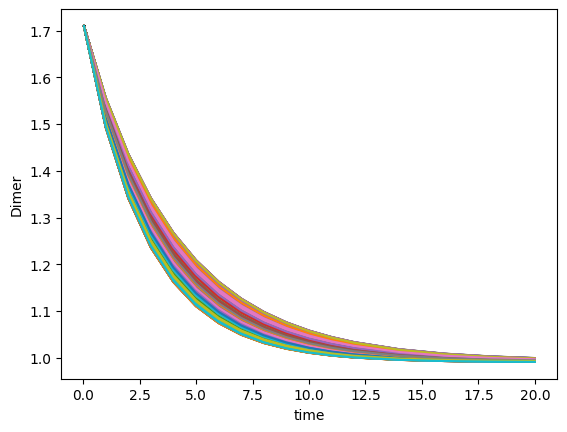

In [79]:
# generate several output for random selections of parameters
N = 1000
kf = np.random.uniform(284*0.8,284*1.2,N);
kr = np.random.uniform(0.3*0.8,0.3*1.2,N);

D11 = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(odes, ic, time, args = (kf[m],kr[m]));
    plt.plot(time,output[:,0]);
    plt.xlabel("time");
    plt.ylabel("Dimer");
    D11[m]=output[-1,1];

In [70]:
pip install seaborn


     -------------------------------------- 288.2/288.2 kB 2.2 MB/s eta 0:00:00


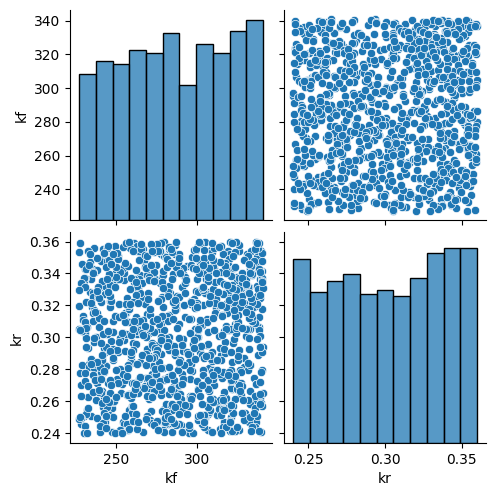

In [72]:
import seaborn as sns

tmp = {'kf':kf, 'kr':kr};
df = pd.DataFrame(tmp);

sns.pairplot(df)  
plt.show()

Our fitted equn is y =  0.007212527915203068 kf +  -0.018722404171852974 kr


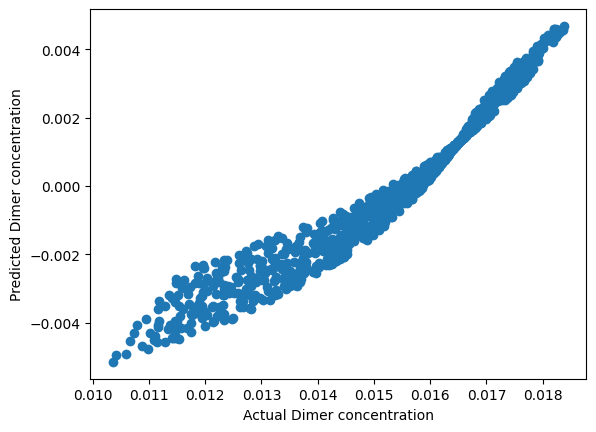

In [81]:
a = (1.05 - D11)/1.05
X = np.c_[(284-kf)/284,(0.3-kr)/0.3]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ a;
print("Our fitted equn is y = ",params[0], "kf + ", params[1], "kr")

plt.plot(a,X @ params,"o");
plt.ylabel("Predicted Dimer concentration");
plt.xlabel("Actual Dimer concentration");

In [82]:
import statsmodels.api as sm
X = np.c_[(284-kf)/284,(0.3-kr)/0.3]
model = sm.OLS(a, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.022
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              10.98
Date:                Mon, 12 Dec 2022   Prob (F-statistic):                    1.92e-05
Time:                        23:26:46   Log-Likelihood:                          2762.1
No. Observations:                1000   AIC:                                     -5520.
Df Residuals:                     998   BIC:                                     -5510.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

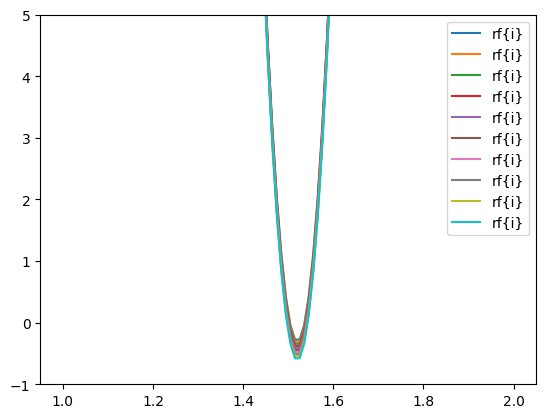

In [124]:
def odes_new(v,kf,kr): 

    D11 = v[0]
    D22 = v[1]
    D12 = v[2]
    
    f_new = [kf*(2*d11_o + d12_o - 2*D11 - D12)**2 - kr*D11, 
         kf*(2*d22_o + d12_o - 2*D22 - D12)**2 - kr*D22,
         2*kf*(2*d11_o + d12_o - 2*D11 - D12)*(2*d22_o + d12_o - 2*D22 - D12) - kr*D12]
    return f_new 

kr = np.linspace(0.2,0.4,10)
kf = 284

D11_values = np.linspace(1,2,100)
D12_values = np.ones(100)
D22_values = np.ones(100)
# D_values = np.array([D11_values, D12_values, D22_values])

for n in kr:
    plt.plot(D11_values, odes_new(np.array([D11_values, D12_values, D22_values]),kf,n)[0], label = "rf{i}")

plt.ylim(-1,5)

plt.legend()

In [115]:
odes_new(np.array([D11_values, D12_values, D22_values]),kf,[0.2])[0] - odes_new(np.array([D11_values, D12_values, D22_values]),kf,0.5)[0]

array([0.3       , 0.3030303 , 0.30606061, 0.30909091, 0.31212121,
       0.31515152, 0.31818182, 0.32121212, 0.32424242, 0.32727273,
       0.33030303, 0.33333333, 0.33636364, 0.33939394, 0.34242424,
       0.34545455, 0.34848485, 0.35151515, 0.35454545, 0.35757576,
       0.36060606, 0.36363636, 0.36666667, 0.36969697, 0.37272727,
       0.37575758, 0.37878788, 0.38181818, 0.38484848, 0.38787879,
       0.39090909, 0.39393939, 0.3969697 , 0.4       , 0.4030303 ,
       0.40606061, 0.40909091, 0.41212121, 0.41515152, 0.41818182,
       0.42121212, 0.42424242, 0.42727273, 0.43030303, 0.43333333,
       0.43636364, 0.43939394, 0.44242424, 0.44545455, 0.44848485,
       0.45151515, 0.45454545, 0.45757576, 0.46060606, 0.46363636,
       0.46666667, 0.46969697, 0.47272727, 0.47575758, 0.47878788,
       0.48181818, 0.48484848, 0.48787879, 0.49090909, 0.49393939,
       0.4969697 , 0.5       , 0.5030303 , 0.50606061, 0.50909091,
       0.51212121, 0.51515152, 0.51818182, 0.52121212, 0.52424